Download aydao-anime-danbooru2019s-512-5268480.pkl  
from https://www.gwern.net/Faces#tadne-download  
to Google Drive MyDrive/workspace.

Download and convert akai_haato.png  
from https://www.hololive.tv/portfolio/items/akai-haato  
to Google Drive MyDrive/workspace.

<a href="https://colab.research.google.com/github/piyo7/gan-playground/blob/main/tadne/project_real_images_tadne.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Select GPU from the Hardware Accelerator.

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
!git clone https://github.com/aydao/stylegan2-surgery.git

Cloning into 'stylegan2-surgery'...
remote: Enumerating objects: 1557, done.
remote: Total 1557 (delta 0), reused 0 (delta 0), pack-reused 1557
Receiving objects: 100% (1557/1557), 17.03 MiB | 39.09 MiB/s, done.
Resolving deltas: 100% (1073/1073), done.


In [3]:
%%capture
!apt install imagemagick

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from IPython.display import Image, display_png
network = '/content/drive/MyDrive/workspace/aydao-anime-danbooru2019s-512-5268480.pkl'

In [6]:
!mkdir /content/images/
!convert -resize 512x512 /content/drive/MyDrive/workspace/akai_haato.png /content/images/akai_haato_r.png

In [7]:
%cd /content/stylegan2-surgery

/content/stylegan2-surgery


In [8]:
%run dataset_tool.py create_aydao ../tfrecords/ ../images/ akai_haato 512 512

Loading images from "../images/"
detected 1 images ...
Shuffle the images... using seed 123
Creating dataset "../tfrecords/"
Adding the images to tfrecords ...
added images 0
Added 1 images.


In [25]:
%run run_projector.py project-real-images --data-dir=../tfrecords/ --dataset=akai_haato --num-images=1 --num-snapshots=10 --network={network}

Local submit - run_dir: results/00001-project-real-images
dnnlib: Running run_projector.project_real_images() on localhost...
Loading networks from "/content/drive/MyDrive/workspace/aydao-anime-danbooru2019s-512-5268480.pkl"...
Loading images from "akai_haato"...
Projecting image 0/1 ...
dnnlib: Finished run_projector.project_real_images() in 9m 38s.


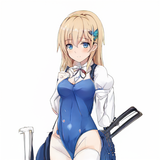

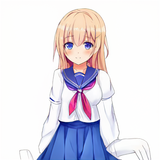

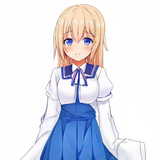

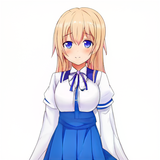

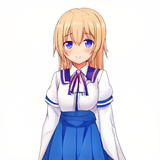

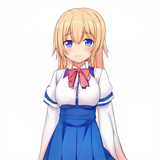

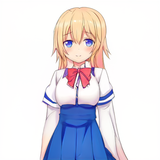

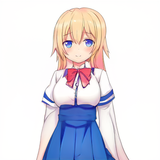

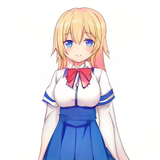

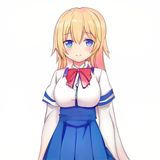

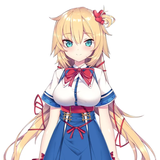

In [27]:
dir = '/content/stylegan2-surgery/results/00001-project-real-images'
for i in range(100, 1001, 100):
  step = f'{i:04}'
  !convert -resize 160x160 {dir}/image0000-step{step}.png {dir}/image0000-step{step}_r.png
  display_png(Image(f'{dir}/image0000-step{step}_r.png'))
!convert -resize 160x160 {dir}/image0000-target.png {dir}/image0000-target_r.png
display_png(Image(f'{dir}/image0000-target_r.png'))